# 関数にしてまとめる

10000
10000
523
651
740
272
241
2000


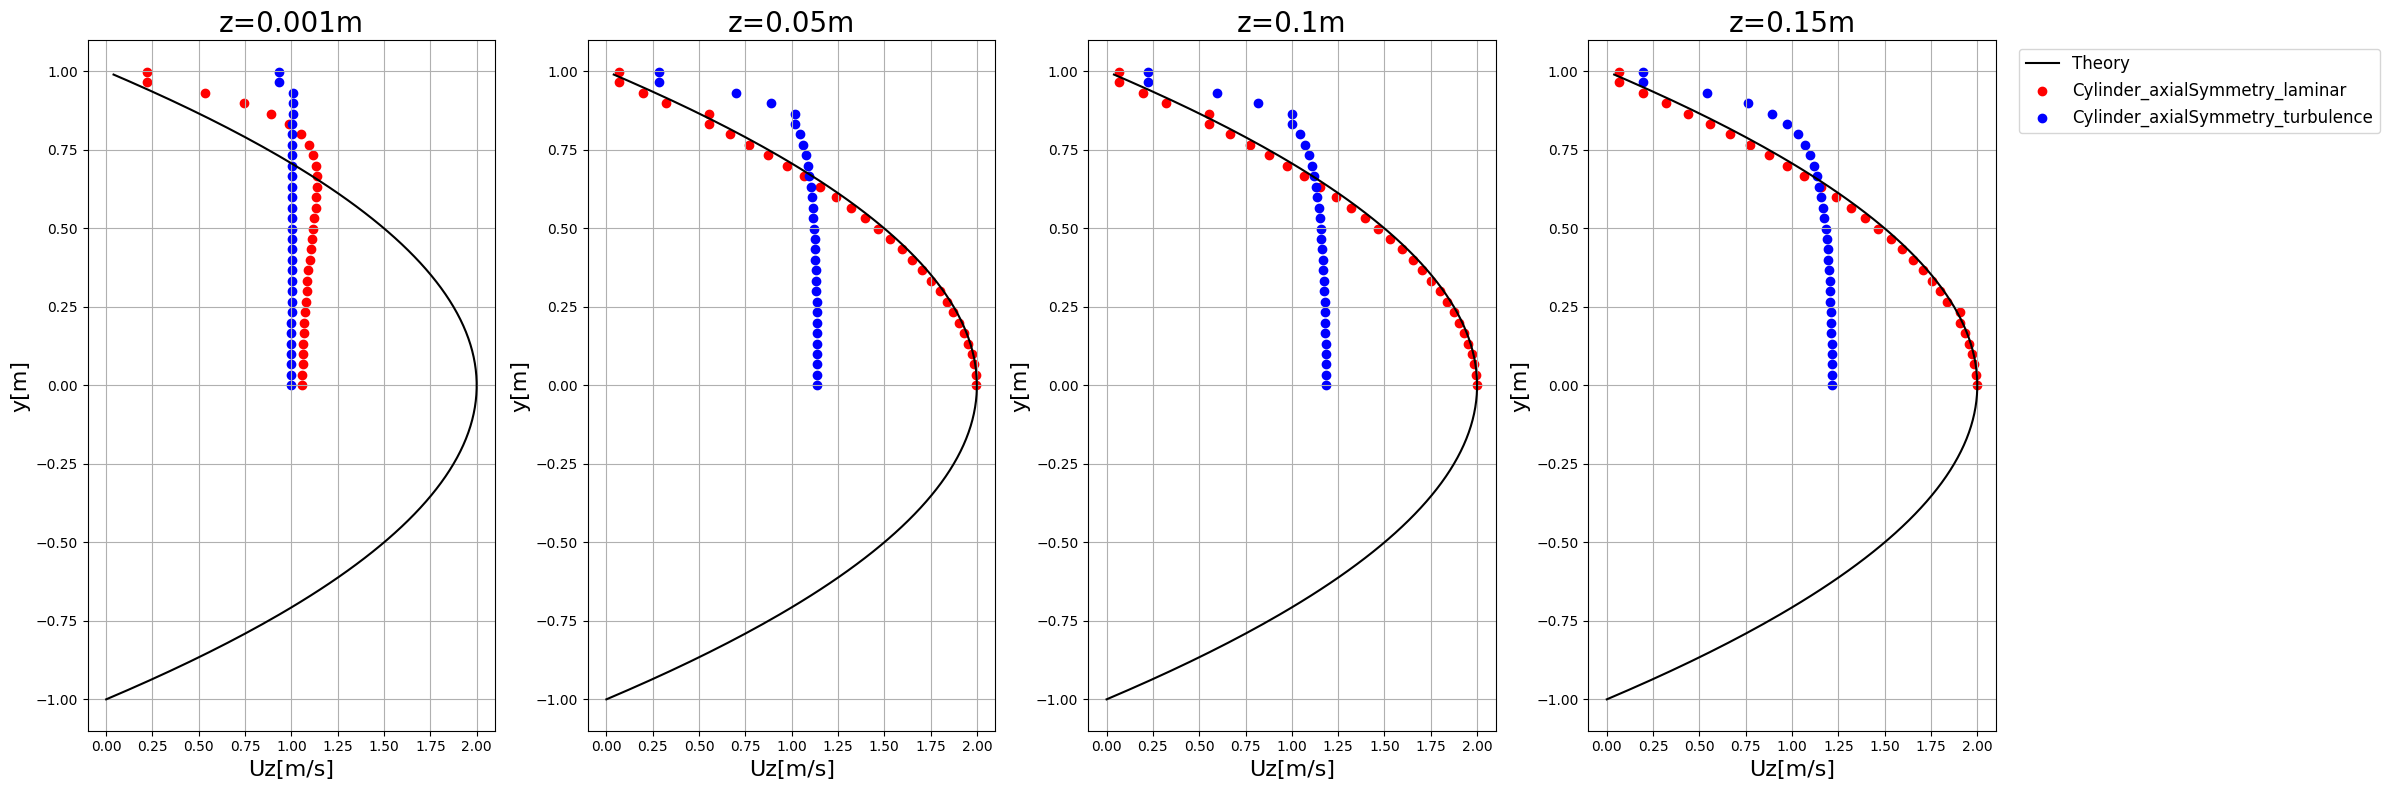

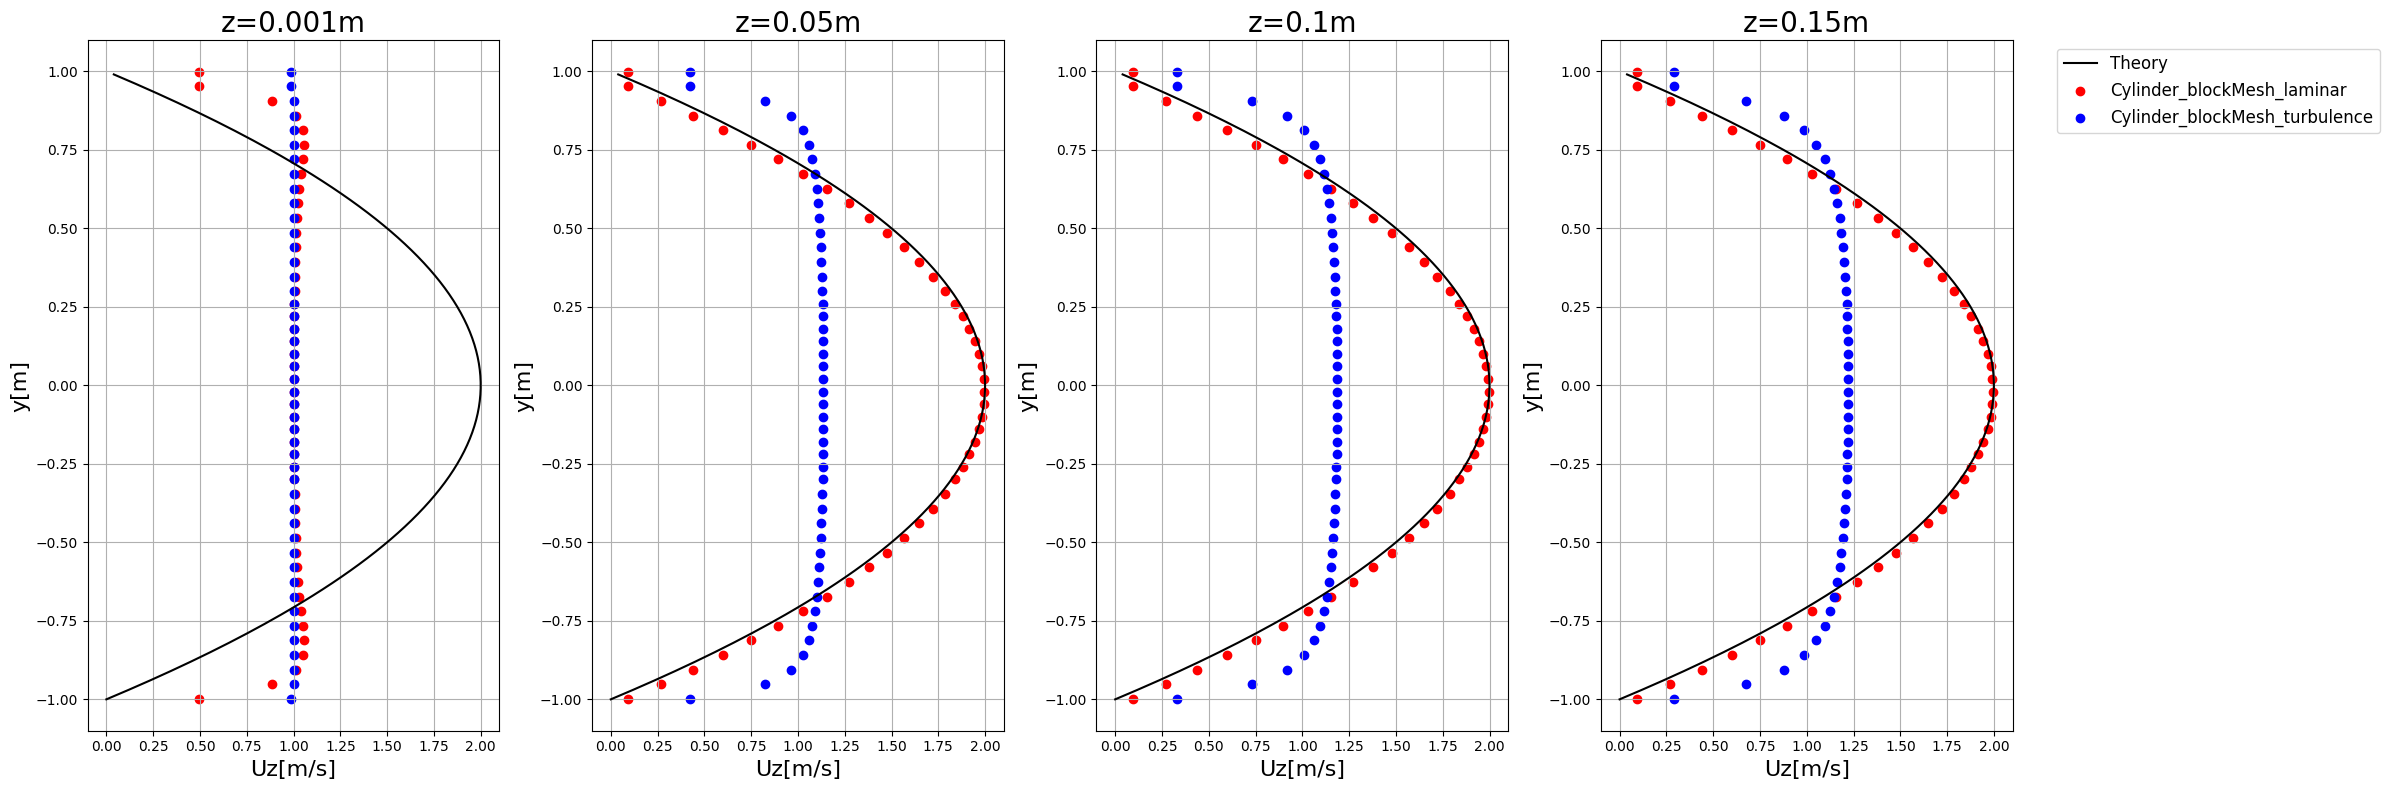

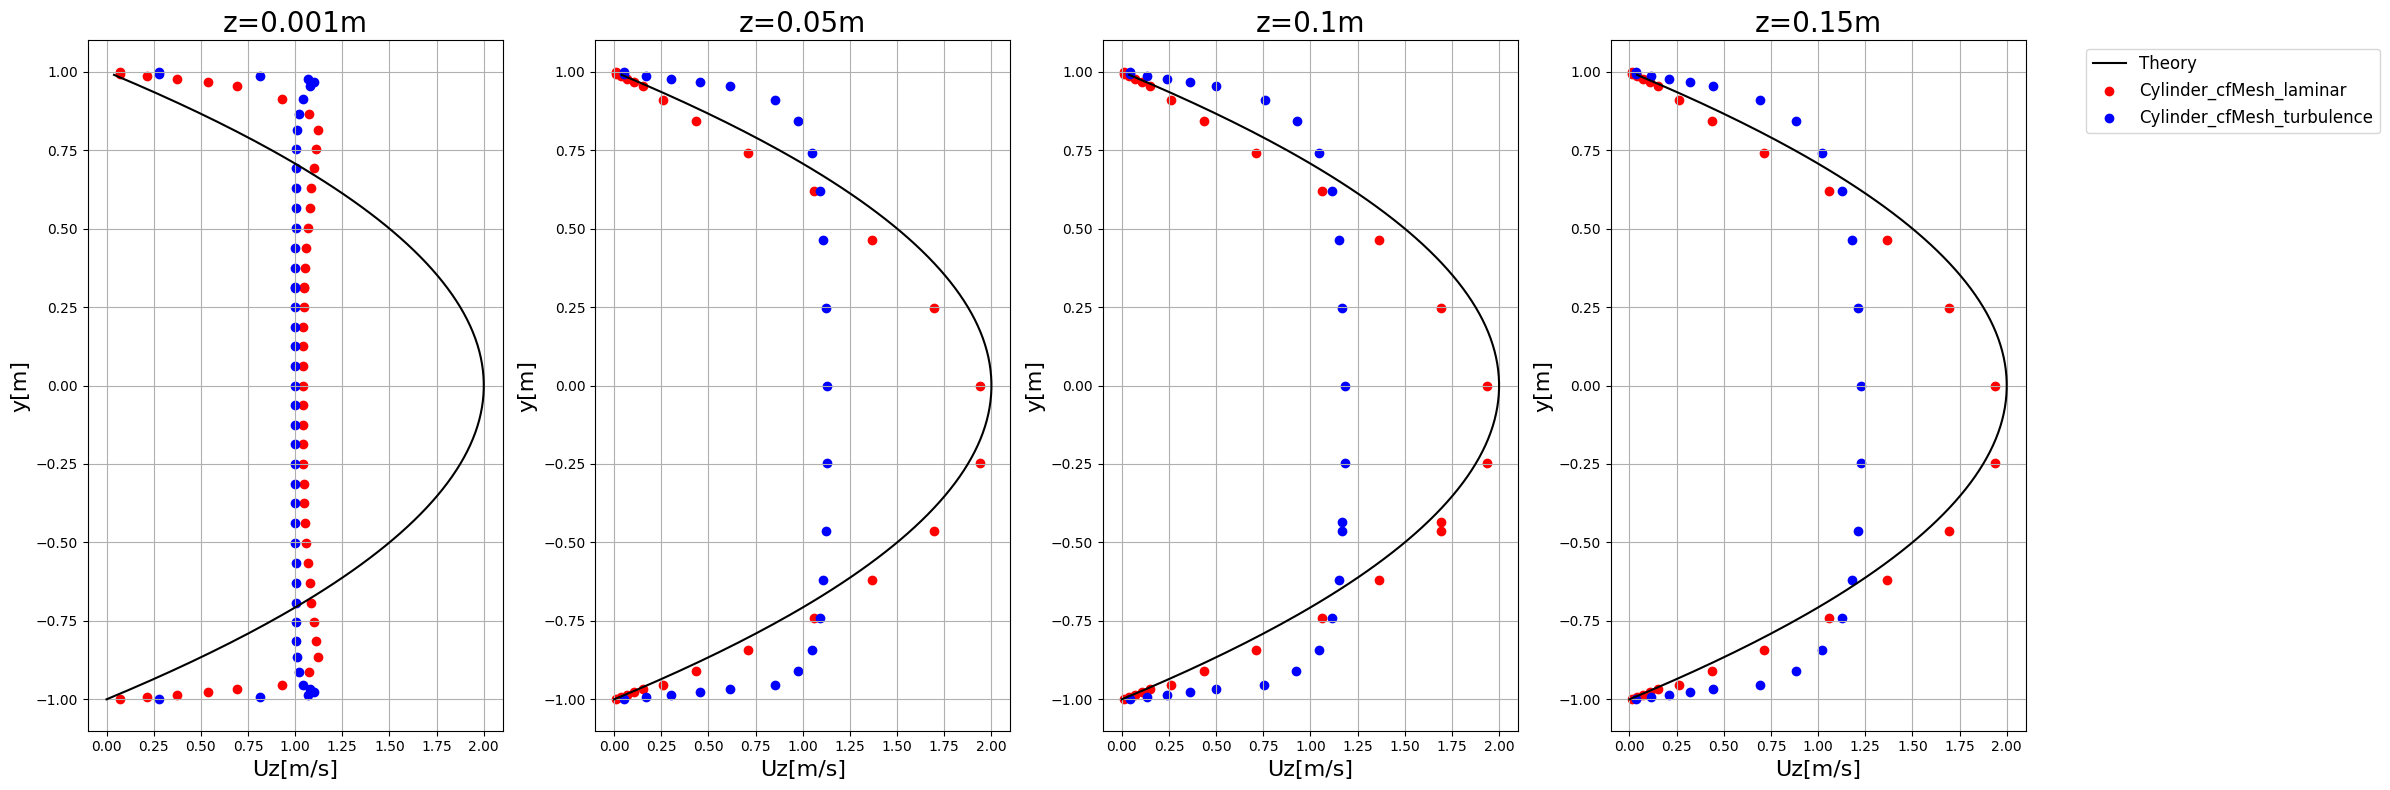

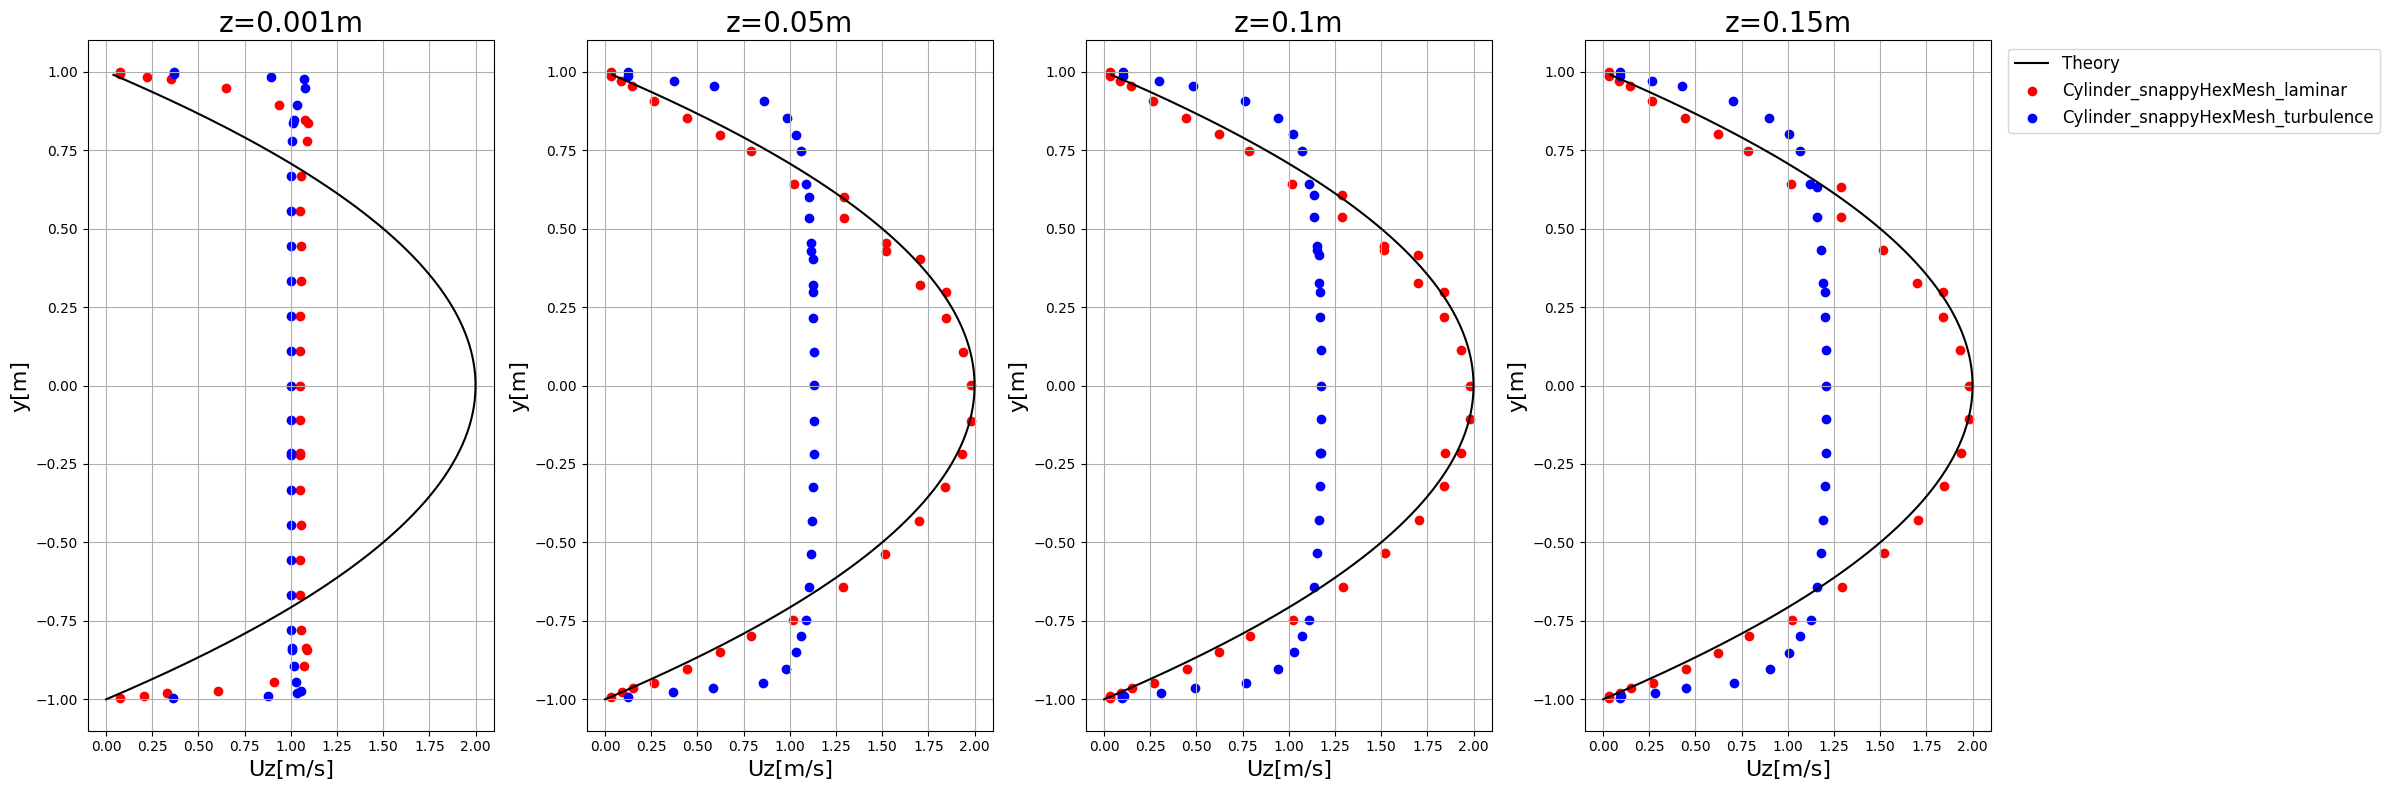

In [62]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import os, shutil
from pathlib import Path


# 文字列を含む要素を数字で昇順にする関数
def atoi(text):
    print(text)
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)^', text) ]

# 数字であるかどうかの判定
def is_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

def graph_plot(clyndeMeshType):

    # 計算パターンのリスト
    resultDir_list = [d for d in os.listdir("./") if clyndeMeshType in d]


    # グラフのセット    
    fig, axes = plt.subplots(1, 4, figsize=(24,8), tight_layout=True)

    # colorの設定（laminar=>red, turbulence=>blue)
    color_list = ["red","blue"]

    Radius = 10/1000 # 半径 10mm = 0.01m
    ub = 1.0        # 断面平均速度(流入速度1.0m/s)
    y = np.arange(-1,1,0.01)
    uy = 2*ub*(1-y**2)

    for j, resultDir in enumerate(resultDir_list):
        resultDir = Path(resultDir)  # 計算フォルダ
        latestTime = sorted([a for a in os.listdir(resultDir) if is_int(a)], key=float)[-1] # latestTimeを抜き出す
        print(latestTime)
        sampleDictdata = resultDir/"postProcessing"/"sampleDict"/latestTime


        # ファイル名を数字部分と非数字部分に分割するための正規表現パターン
        pattern = r'(\d*\.\d+|\d+)'
        # 数字部分だけを抜き出して、数値に変換してソートする
        caseList = sorted(os.listdir(sampleDictdata), key=lambda f: [float(d) if d.isdigit() else d for d in re.split(pattern, f)])
 
        for i, zCase in enumerate(caseList):
            if j ==0 :axes[i].plot(uy, y, color="black", label="Theory")

            df_data = pd.read_table(sampleDictdata/zCase, index_col=False, names=('x[m]', 'y[m]', 'z[m]', 'Ux[m/s]', 'Uy[m/s]', 'Uz[m/s]'))
            axes[i].scatter(df_data["Uz[m/s]"], df_data["x[m]"]/Radius, color=color_list[j], label=f"{resultDir}")


            axes[i].set_ylabel("y[m]", fontsize=16)
            axes[i].set_xlabel("Uz[m/s]", fontsize=16)
            if i>=3: plt.legend(loc="upper center",bbox_to_anchor=(1.5, 1.0), fontsize=12)
            axes[i].grid("-")
            axes[i].set_title(f"z={zCase.split('_')[1]}", fontsize=20)
            
    plt.savefig(f"{clyndeMeshType}.png")
        
        
# ================ main ===================
clynderMeshTypeList = [
    "Cylinder_axialSymmetry",
    "Cylinder_blockMesh",
    "Cylinder_cfMesh",
    "Cylinder_snappyHexMesh"
    ]

for clyndeMeshType in clynderMeshTypeList:
    graph_plot(clyndeMeshType)